In [1]:
import matplotlib.pyplot as plt
quality_cutoff = 0.9

#Upload raw seqs
raw_seqs = []
for round in range(1,7):
    raw_seqs.append(open('/Users/zoeweiss/Desktop/Desktop/lab(s)/szostak/spring 2022/ppp landscape/seqs/ppp-'+str(round)+'_S'+str(round)+'_L001_R2_001.fastq').readlines())


#Filter by quality
all_high_quality = []
unique_high_quality = []
for round in raw_seqs:
    high_quality = []
    seqs = round[1::4]
    qualities = round[3::4]
    acceptable_quals_1_percent_error = [5,6,7,8,9,':',';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
    for seq in range(len(qualities)):
        overlap=0
        for char in list(set(qualities[seq]).intersection(acceptable_quals_1_percent_error)):
            overlap+=qualities[seq].count(char)
        if overlap/len(qualities[1])>quality_cutoff:
            high_quality.append(seqs[seq].strip("\n"))
    print('High quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(high_quality)))
    all_high_quality.append(high_quality)
    unique_high_quality.append(list(set(high_quality)))
    print('Unique high quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(list(set(high_quality)))))
    
#Trim seqs to randomized region
all_trimmed_seqs = []
all_unique_trimmed_seqs = []
round = 1
for round in range(len(all_high_quality)):
    trimmed_seqs = []
    for seq in all_high_quality[round]:
        if 'ACTCACTGACACAGATCCACTCACGGACAGCG' in seq and 'CGCTGTCC' in seq:
            if len(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')]) == 40:
                trimmed_seqs.append(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')])
    all_trimmed_seqs.append(trimmed_seqs)
    all_unique_trimmed_seqs.append(list(set(trimmed_seqs)))

    
int8 = 'GACAGCTGAGAACTGAGTGGCCTAATTGGGAGAATGAGCT'
int3e = 'GAAAGCTGCGAACCGAGCGGCCTAATTGGCAGACTGAGCT'

High quality seqs r1: 1793335
Unique high quality seqs r1: 1658322
High quality seqs r2: 1824368
Unique high quality seqs r2: 1617437
High quality seqs r3: 1238531
Unique high quality seqs r3: 301725
High quality seqs r4: 1959238
Unique high quality seqs r4: 136149
High quality seqs r5: 1553726
Unique high quality seqs r5: 115878
High quality seqs r6: 1515844
Unique high quality seqs r6: 126708


In [2]:
def sm(inta, intb):
    #Where positions differ
    pos_differ = []
    for pos in range(len(inta)):
        if inta[pos]!=intb[pos]:
            pos_differ.append(pos)
    #Single muts to make inta 1 mut closer to intb
    muts = []
    for pos in pos_differ:
        muts.append(inta[:pos]+intb[pos]+inta[1+pos:])
    return muts

In [3]:
sms = sm(int8, int3e)
dms = []
for seq in sms:
    dms+=(sm(seq, int3e))
tms = []
for seq in dms:
    tms+=(sm(seq, int3e))
qms = []
for seq in tms:
    qms+=(sm(seq, int3e))
pms = []
for seq in qms:
    pms+=(sm(seq, int3e))
hms = []
for seq in pms:
    hms+=(sm(seq, int3e))

In [4]:
for round in all_unique_trimmed_seqs:
    print(list(set(sms)&set(round)))


[]
['GACAGCTGCGAACTGAGTGGCCTAATTGGGAGAATGAGCT']
[]
['GACAGCTGCGAACTGAGTGGCCTAATTGGGAGAATGAGCT', 'GACAGCTGAGAACTGAGTGGCCTAATTGGGAGACTGAGCT', 'GACAGCTGAGAACCGAGTGGCCTAATTGGGAGAATGAGCT']
['GACAGCTGCGAACTGAGTGGCCTAATTGGGAGAATGAGCT', 'GACAGCTGAGAACTGAGTGGCCTAATTGGGAGACTGAGCT', 'GACAGCTGAGAACTGAGCGGCCTAATTGGGAGAATGAGCT']
['GACAGCTGCGAACTGAGTGGCCTAATTGGGAGAATGAGCT', 'GACAGCTGAGAACTGAGTGGCCTAATTGGGAGACTGAGCT', 'GACAGCTGAGAACTGAGCGGCCTAATTGGGAGAATGAGCT']


In [5]:
all_trimmed = []
for round in all_trimmed_seqs:
    all_trimmed+=round


In [6]:
seq ='GACAGCTGAGAACTGAGTGGCCTAATTGGGAGACTGAGCT'
for round in all_trimmed_seqs:
    print(round.count(seq))

0
0
0
1
2
1


In [7]:
#RS1->CS1 path
def seqmatch(seq1,seq2):
    overlap = 0
    total = 0
    for position in range(len(seq1)):
        total+=1
        if seq1[position]==seq2[position]:
            overlap+=1
    return overlap/total

rs1 = 'GAATGCTGCCAACCGTGCGGGCTAATTGGCAGACTGAGCT'
int1 = 'GAATGCTGCCAACCGAGCGGGCTAATTGGCAGACTGAGCT'
int2 = 'GAAAGCTGCCAACCGAGCGGGCTAATTGGCAGACTGAGCT'
int3 = 'GAAAGCTGCCAACCGAGCGGCCTAATTGGCAGACTGAGCT'
int4 = 'GAAAGCTGCGAACCGAGCGGCCTAATTGGCAGACTGAGCT'
int5 = 'GAAAGCTGCGAACTGAGCGGCCTAATTGGCAGACTGAGCT'
int6 = 'GAAAGCTGCGAACTGAGCGGCCTAATTGGCAGAATGAGCT'
int7 = 'GACAGCTGCGAACTGAGCGGCCTAATTGGCAGAATGAGCT'
int8 = 'GACAGCTGCGAACTGAGCGGCCTAATTGGGAGAATGAGCT'
int9 = 'GACAGCTGCGAACTGAGTGGCCTAATTGGGAGAATGAGCT'
int10 = 'GACAGCTGAGAACTGAGTGGCCTAATTGGGAGAATGAGCT' 
int11 = 'GACAGCTGAGAACTGAGTGGCCTAAATGGGAGAATGAGCT'
int12 = 'GACAGCCGAGAACTGAGTGGCCTAAATGGGAGAATGAGCT'
cs1 = 'GACAGCCGAGAAATGAGTGGCCTAAATGGGAGAATGAGCT'

path = [rs1, int1, int2, int3, int4, int5, int6, int7, int8, int9, int10, int11, int12, cs1]

for seq in range(len(path)-1):
    print(seqmatch(path[seq], path[seq+1]))

counts = []
for seq in path:
    counts.append(all_trimmed.count(seq))

0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975


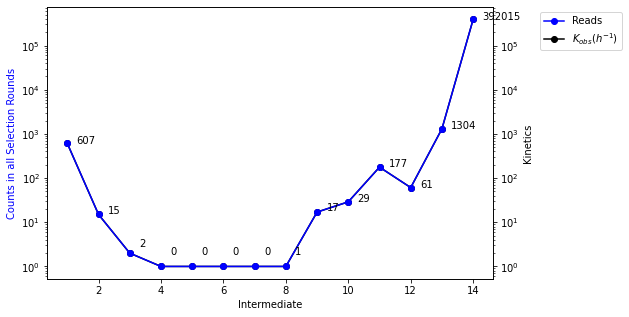

In [37]:
#Plot the ints

counts_replace_zeros = []
for el in counts:
    if el ==0:
        counts_replace_zeros.append(1)
    else:
        counts_replace_zeros.append(el)
counts_replace_zeros

fig, ax1 = plt.subplots(figsize = (8,5))

lns = []
ax2 = ax1.twinx()

lns+=ax2.plot(range(1,1+len(counts_replace_zeros)), counts_replace_zeros, color = 'b', label = 'Reads', marker = 'o')
ax2.set_yscale('log')
ax2.set_ylabel('Kinetics')
ax2.yaxis.label.set_color('k')

lns+=ax1.plot(range(1,1+len(counts_replace_zeros)), counts_replace_zeros, color = 'k', label = '$K_{obs}(h^{-1})$', marker = 'o')
ax1.set_yscale('log')
ax1.set_xlabel('Intermediate')
ax1.set_ylabel('Counts in all Selection Rounds')

ax1.yaxis.label.set_color('blue')



# added these three lines
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, bbox_to_anchor = (1.3,1))

for i, label in enumerate(counts):
    plt.annotate(label, (list(range(1,1+len(counts_replace_zeros)))[i]+.3, .8+counts_replace_zeros[i]))
    
plt.show()

In [16]:
counts

[607, 15, 2, 0, 0, 0, 0, 1, 17, 29, 177, 61, 1304, 392015]